In [1]:
"""
I turn data into 5-year averages

Then, I reestimate panel models

"""

'\nI turn data into 5-year averages\n\nThen, I reestimate panel models\n\n'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir("C:\\Users\\Vladimir.Grigoryev\\Documents\\Python Scripts\\eci")
path = pd.read_csv("final_dataset.csv")
dt = pd.DataFrame(path)
dt.drop("Unnamed: 0", axis = 1, inplace=True)
dt.head()

,map,code,year,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc
0,ABW1960,ABW,1960,NaN,NaN,NaN,NaN,54211.0,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW1961,ABW,1961,NaN,NaN,NaN,NaN,55438.0,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW1962,ABW,1962,NaN,NaN,NaN,NaN,56225.0,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW1963,ABW,1963,NaN,NaN,NaN,NaN,56695.0,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW1964,ABW,1964,NaN,NaN,NaN,NaN,57032.0,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# taking slice of data for simplicity
dg = dt[["map", "code", "year"]]

# creating grouping variable "group"
dg["group"] = dg.index

# setting the size of step
n = 5

dg.head()

C:\Users\Vladimir.Grigoryev\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,map,code,year,group
0,ABW1960,ABW,1960,0
1,ABW1961,ABW,1961,1
2,ABW1962,ABW,1962,2
3,ABW1963,ABW,1963,3
4,ABW1964,ABW,1964,4


In [3]:
# populating grouping variable
inst = dg.values
for i in range(len(inst)):
    y = inst[i][2] % 10
    if (y >= 0) and (y < 5):
        inst[i][3] = inst[i][2] // 10 * 10
    else:
        inst[i][3] = inst[i][2] // 10 * 10 + 5
        
dr = pd.DataFrame(inst, columns = ("map", "code", "year", "group"))
dr.head(7)

,map,code,year,group
0,ABW1960,ABW,1960,1960
1,ABW1961,ABW,1961,1960
2,ABW1962,ABW,1962,1960
3,ABW1963,ABW,1963,1960
4,ABW1964,ABW,1964,1960
5,ABW1965,ABW,1965,1965
6,ABW1966,ABW,1966,1965


In [4]:
dh = pd.merge(dt, dr[["map", "group"]], how="inner", on="map")
dh.head()

,map,code,year,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc,group
0,ABW1960,ABW,1960,NaN,NaN,NaN,NaN,54211.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
1,ABW1961,ABW,1961,NaN,NaN,NaN,NaN,55438.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
2,ABW1962,ABW,1962,NaN,NaN,NaN,NaN,56225.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
3,ABW1963,ABW,1963,NaN,NaN,NaN,NaN,56695.0,NaN,NaN,NaN,NaN,NaN,NaN,1960
4,ABW1964,ABW,1964,NaN,NaN,NaN,NaN,57032.0,NaN,NaN,NaN,NaN,NaN,NaN,1960


In [23]:
dk = dh.drop("year", axis=1).groupby(["code", "group"]).mean()
dk.head(3)

eci1  eci2  eci3  gdp_pc  population  res_exp1_to_gdp  \
code group                                                          
ABW  1960    NaN   NaN   NaN     NaN     55920.2              NaN   
     1965    NaN   NaN   NaN     NaN     58048.4              NaN   
     1970    NaN   NaN   NaN     NaN     59822.8              NaN   

            res_exp2_to_gdp  res_exp3_to_gdp  oil_rents  res_rents  \
code group                                                           
ABW  1960               NaN              NaN        NaN        NaN   
     1965               NaN              NaN        NaN        NaN   
     1970               NaN              NaN        NaN        NaN   

            oil_prod_pc  
code group               
ABW  1960           NaN  
     1965           NaN  
     1970           NaN

In [40]:
inst[0][-1] = str(inst[0][-1][0]) + str(inst[0][-1][1])

In [67]:
dl = dk
dl["map_av"] = dl.index
inst = dl.values
for i in range(len(inst)):
    inst[i][-1] = str(inst[i][-1][0]) + str(inst[i][-1][1])
    
    
dc = pd.DataFrame(inst, columns = ('eci1', 'eci2', "eci3", "gdp_pc", "population", "res_exp1_to_gdp", 
                                   "res_exp2_to_gdp", "res_exp3_to_gdp", "oil_rents", "res_rents", "oil_prod_pc", "map"))
dc.head()

,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc,map
0,NaN,NaN,NaN,NaN,55920.2,NaN,NaN,NaN,NaN,NaN,NaN,ABW1960
1,NaN,NaN,NaN,NaN,58048.4,NaN,NaN,NaN,NaN,NaN,NaN,ABW1965
2,NaN,NaN,NaN,NaN,59822.8,NaN,NaN,NaN,NaN,NaN,NaN,ABW1970
3,NaN,NaN,NaN,NaN,60338.4,NaN,NaN,NaN,NaN,NaN,NaN,ABW1975
4,NaN,NaN,NaN,NaN,61409,NaN,NaN,NaN,NaN,NaN,NaN,ABW1980


In [68]:
dv = pd.merge(dc, dr[["map", "code", "year"]], how="inner", on="map")
dv.tail()

,eci1,eci2,eci3,gdp_pc,population,res_exp1_to_gdp,res_exp2_to_gdp,res_exp3_to_gdp,oil_rents,res_rents,oil_prod_pc,map,code,year
3447,-0.414066,-0.407226,0.242909,641.177,1.17013e+07,0.00134059,0.0555417,0.180871,0,5.99243,0,ZWE1995,ZWE,1995
3448,-0.584154,-0.442014,0.0594662,502.095,1.25001e+07,0.000858401,0.0842671,0.21188,0,5.58261,0,ZWE2000,ZWE,2000
3449,-0.528349,-0.294948,0.125866,456.423,1.33527e+07,0.000664187,0.280849,0.379081,0,13.0108,1.45893e-09,ZWE2005,ZWE,2005
3450,-0.88819,-0.91598,-0.454469,1106.32,1.473e+07,0.000773237,0.0502525,0.113936,0,7.76242,1.0987e-08,ZWE2010,ZWE,2010
3451,-0.744267,-0.761537,-0.727709,1290.34,1.61526e+07,0.000449432,0.0247183,0.0788505,0,6.8209,4.8504e-08,ZWE2015,ZWE,2015


In [81]:
dv.to_csv("5y_dataset.csv")

In [55]:
# extension
# drawing graphs
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

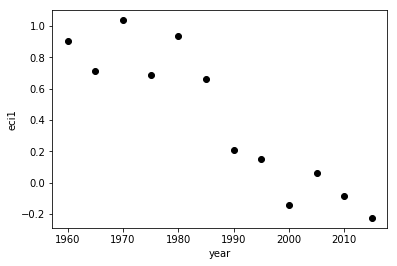

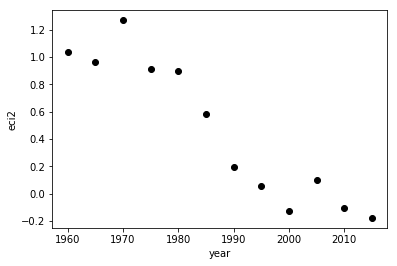

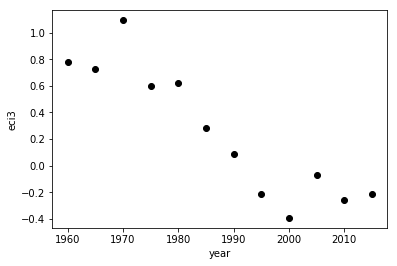

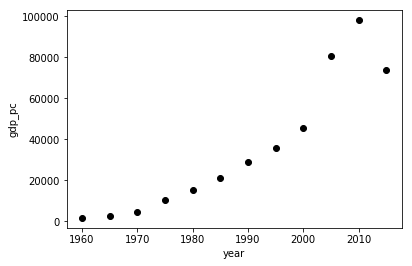

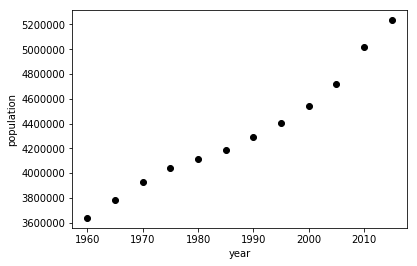

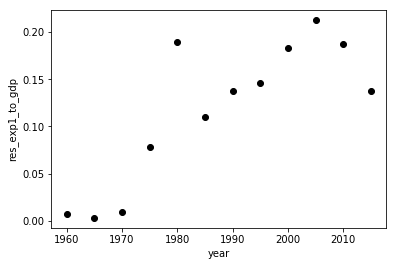

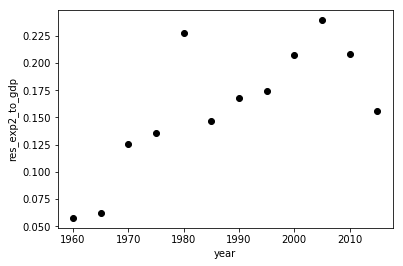

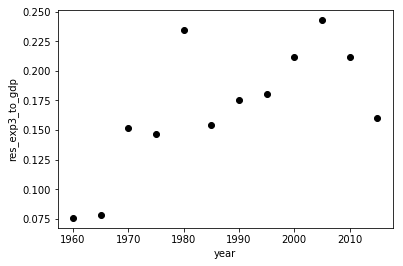

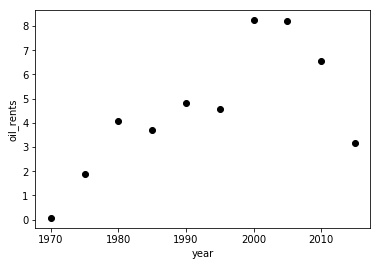

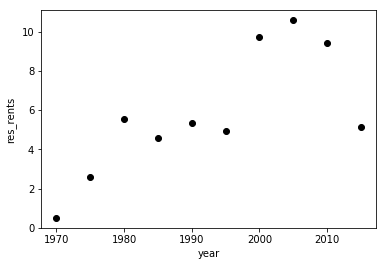

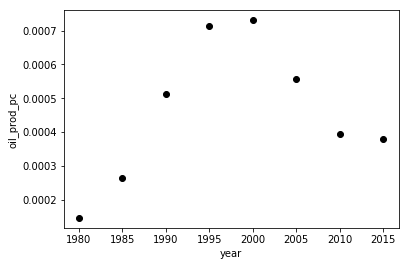

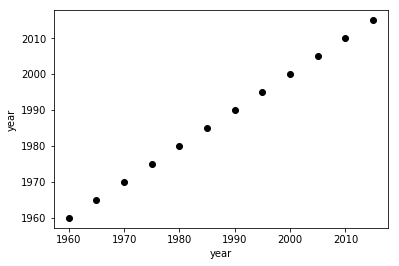

In [5]:
path = pd.read_csv("5y_dataset.csv")
dv = pd.DataFrame(path)

filt = dv.code == "NOR"
nor = dv[filt]
nor = nor[['eci1', 'eci2', "eci3", "gdp_pc", "population", "res_exp1_to_gdp", 
                                   "res_exp2_to_gdp", "res_exp3_to_gdp", 
     "oil_rents", "res_rents", "oil_prod_pc", "year"]].astype(float)

for column in nor.columns:
    if nor[column].dtypes == "float64":
        x = nor.year.astype(int)
        y = nor[column]
        plt.figure()
        plt.xlabel("year")
        plt.ylabel(column)
        print(plt.plot(x, y, 'o', color='black'))

<Figure size 432x288 with 0 Axes>

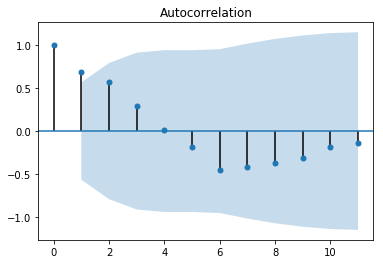

<Figure size 432x288 with 0 Axes>

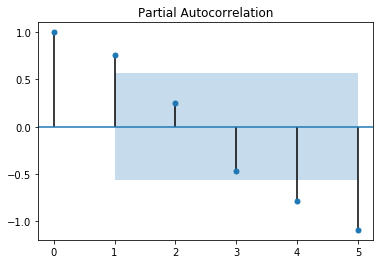

In [73]:
filt = dv.code == "NOR"
nor = dv[filt]
series = pd.Series(nor["eci1"].astype(float).dropna())
plt.figure()
plot_acf(series)
plt.show()

plt.figure()
plot_pacf(series, lags=5)
plt.show()